In [1]:

import numpy as np

# ----------------------------------------------------------------------
# Taken from:
# https://en.wikipedia.org/wiki/Tridiagonal_matrix_algorithm
# BUT - they go from 1 -> n and python goes from 0 -> n-1
# ----------------------------------------------------------------------

def solve_tridiagonal(a, b, c, d):

    """ Function that solves a tridiagonal matrix

    Parameters
    ----------
    a - i-1 coefficient
    b - i coefficient
    c - i+1 coefficient
    d - source term

    Returns
    -------
    x - solution to tri-diagonal matrix

    Notes
    -----
    Solve system of equation

    """
    
    nPts = len(a)

    cp = np.zeros(nPts)
    dp = np.zeros(nPts)
    x = np.zeros(nPts)

    # calculate c':
    i = 0
    cp[i] = c[i]/b[i]
    for i in range(1, nPts-1):
        cp[i] = c[i] / (b[i] - a[i] * cp[i-1])

    # calculate d':
    i = 0
    dp[i] = d[i]/b[i]
    for i in range(1, nPts):
        dp[i] = (d[i] - a[i] * dp[i-1]) / (b[i] - a[i] * cp[i-1])

    # calculate x:
    i = nPts - 1
    x[i] = dp[i]
    for i in range(nPts-2, -1, -1):
        x[i] = dp[i] - cp[i] * x[i + 1]

    return x


writing :  conduction_v1.png


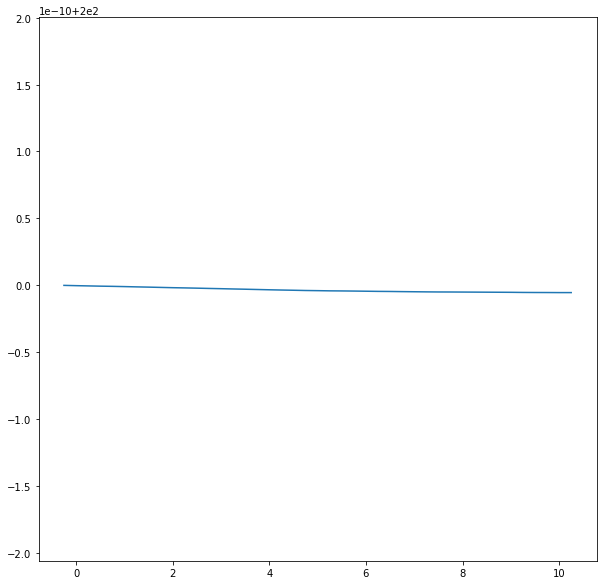

In [2]:

import numpy as np
import matplotlib.pyplot as plt
#from tridiagonal import solve_tridiagonal

# ----------------------------------------------------------------------
# Main code
# ----------------------------------------------------------------------

if __name__ == "__main__":

    dx = 0.25

    # set x with 1 ghost cell on both sides:
    x = np.arange(-dx, 10 + 2 * dx, dx)

    t_lower = 200.0
    t_upper = 1000.0

    nPts = len(x)

    # set default coefficients for the solver:
    a = np.zeros(nPts) - 1
    b = np.zeros(nPts) + 2
    c = np.zeros(nPts) - 1
    d = np.zeros(nPts)

    # boundary conditions (bottom - fixed):
    a[0] = 0
    b[0] = 1
    c[0] = 0
    d[0] = t_lower

    # top - floating boundary:
    a[-1] = 1
    b[-1] = -1
    c[-1] = 0
    d[-1] = t_upper*0

    # Add a source term:
    
    # solve for Temperature:
    t = solve_tridiagonal(a, b, c, d)

    # plot:
    fig = plt.figure(figsize = (10,10),facecolor = 'white')
    ax = fig.add_subplot(111)

    ax.plot(x, t)

    plotfile = 'conduction_v1.png'
    print('writing : ',plotfile)    
    fig.savefig(plotfile)
    plt.show()
    plt.close()
    
    
    


In [3]:
#SETTING THE SOURCE TERM
Q       = np.zeros_like(t)
Lambda  = 10
Delta_z = x[1]-x[0]
Delta_z2= Delta_z * Delta_z
D = Q * Delta_z2 / Lambda
print(D)
print(Delta_z)
print(Delta_z2)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.25
0.0625


writing :  conduction_v1.png


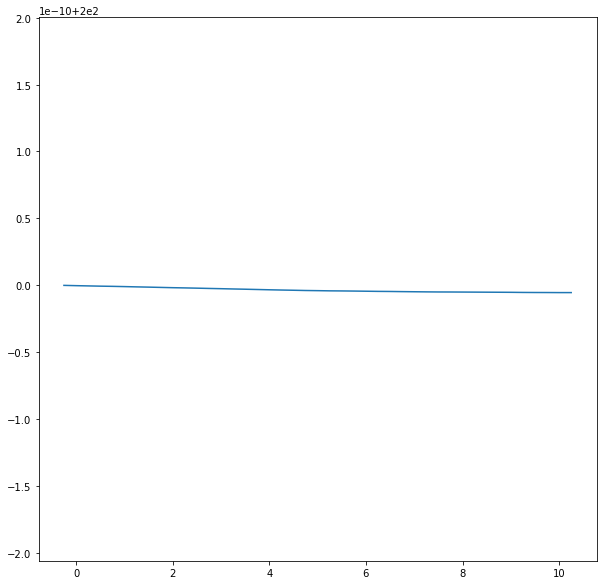

In [4]:

dx = 0.25

# set x with 1 ghost cell on both sides:
x = np.arange(-dx, 10 + 2 * dx, dx)

t_lower = 200.0
t_upper = 1000.0

nPts = len(x)

# set default coefficients for the solver:
a = np.zeros(nPts) - 1
b = np.zeros(nPts) + 2
c = np.zeros(nPts) - 1
d = D

# boundary conditions (bottom - fixed):
a[0] = 0
b[0] = 1
c[0] = 0
d[0] = t_lower

# top - floating boundary:
a[-1] = 1
b[-1] = -1
c[-1] = 0
d[-1] = t_upper*0

# Add a source term:

# solve for Temperature:
t = solve_tridiagonal(a, b, c, d)

# plot:
fig = plt.figure(figsize = (10,10),facecolor = 'white')
ax = fig.add_subplot(111)

ax.plot(x, t)

plotfile = 'conduction_v1.png'
print('writing : ',plotfile)    
#fig.savefig(plotfile)
plt.show()
plt.close()
    
    

[0.    0.    0.    0.    0.    0.    0.625 0.625 0.625 0.625 0.625 0.625
 0.625 0.625 0.625 0.625 0.625 0.625 0.625 0.625 0.625 0.625 0.625 0.625
 0.625 0.625 0.625 0.625 0.625 0.625 0.625 0.625 0.625 0.625 0.625 0.625
 0.625 0.    0.    0.    0.    0.    0.   ]
0.25
0.0625
writing :  conduction_v1.png


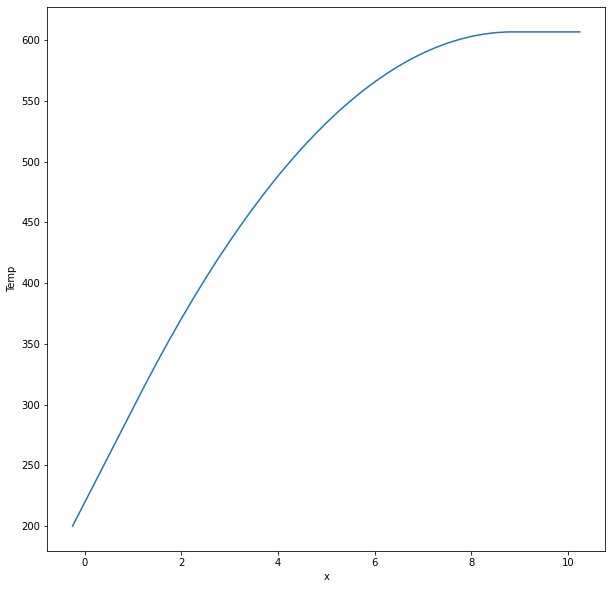

In [5]:
Q       = np.zeros_like(t)
Q[(x>1) & (x<9)] = 100   #--> We are giving a source term in 3<x<7
#for i in range(3,8):
#    Q[i] = 100
Lambda  = 10
Delta_z = x[1]-x[0]
Delta_z2= Delta_z * Delta_z
D = Q * Delta_z2 / Lambda
print(D)
print(Delta_z)
print(Delta_z2)

dx = 0.25

# set x with 1 ghost cell on both sides:
x = np.arange(-dx, 10 + 2 * dx, dx)

t_lower = 200.0
t_upper = 1000.0

nPts = len(x)

# set default coefficients for the solver:
a = np.zeros(nPts) - 1
b = np.zeros(nPts) + 2
c = np.zeros(nPts) - 1
d = D

# boundary conditions (bottom - fixed):
a[0] = 0
b[0] = 1
c[0] = 0
d[0] = t_lower

# top - floating boundary:
a[-1] = 1
b[-1] = -1
c[-1] = 0
d[-1] = t_upper*0

# Add a source term:

# solve for Temperature:
t = solve_tridiagonal(a, b, c, d)

# plot:
fig = plt.figure(figsize = (10,10),facecolor = 'white')
ax = fig.add_subplot(111)

ax.plot(x, t)
plt.ylabel('Temp')
plt.xlabel('x')

plotfile = 'conduction_v1.png'
print('writing : ',plotfile)    
#fig.savefig(plotfile)
plt.show()
plt.close()
    


[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.625 0.625 0.625 0.625 0.625 0.625 0.625 0.625 0.625 0.625
 0.625 0.625 0.625 0.625 0.625 0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.   ]
0.25
0.0625
writing :  conduction_v1.png


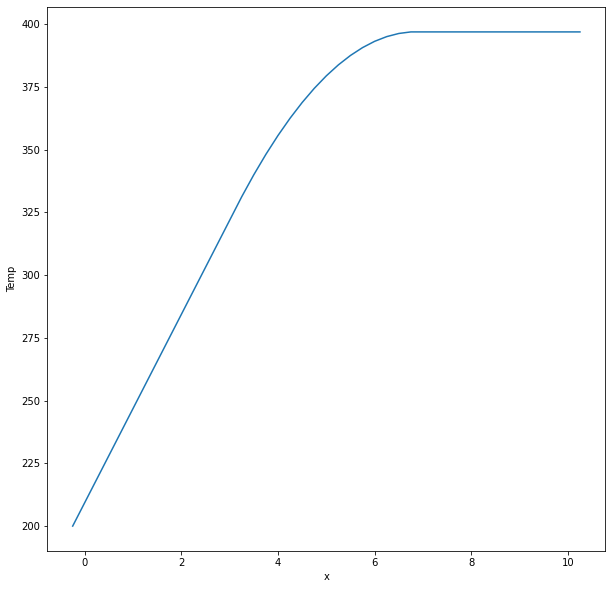

In [6]:
# TRY to give a fixed value at x = 5 , and leave floating boundaries in the top and bottom

Q       = np.zeros_like(t)
Q[(x>3) & (x<7)] = 100   #--> We are giving a source term in 3<x<7
#for i in range(3,8):
#    Q[i] = 100
Lambda  = 10
Delta_z = x[1]-x[0]
Delta_z2= Delta_z * Delta_z
D = Q * Delta_z2 / Lambda
print(D)
print(Delta_z)
print(Delta_z2)

dx = 0.25

# set x with 1 ghost cell on both sides:
x = np.arange(-dx, 10 + 2 * dx, dx)

t_lower = 200.0
t_upper = 1000.0

nPts = len(x)

# set default coefficients for the solver:
a = np.zeros(nPts) - 1
b = np.zeros(nPts) + 2
c = np.zeros(nPts) - 1
d = D

# boundary conditions (bottom - fixed):
a[0] = 0
b[0] = 1
c[0] = 0
d[0] = t_lower

# top - floating boundary:
a[-1] = 1
b[-1] = -1
c[-1] = 0
d[-1] = t_upper*0

# Add a source term:

# solve for Temperature:
t = solve_tridiagonal(a, b, c, d)

# plot:
fig = plt.figure(figsize = (10,10),facecolor = 'white')
ax = fig.add_subplot(111)

ax.plot(x, t)
plt.ylabel('Temp')
plt.xlabel('x')

plotfile = 'conduction_v1.png'
print('writing : ',plotfile)    
#fig.savefig(plotfile)
plt.show()
plt.close()
    


# We are going to make it time dependent (simplified tho)
adding a Q_euv(z , time)


[  0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.         196.59258263
 196.59258263 196.59258263 196.59258263 196.59258263 196.59258263
 196.59258263 196.59258263 196.59258263 196.59258263 196.59258263
 196.59258263 196.59258263 196.59258263 196.59258263   0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.        ]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         1.22870364 1.22870364 1.22870364 1.22870364
 1.22870364 1.22870364 1.22870364 1.22870364 1.22870364 1.22870364
 1.22870364 1.22870364 1.22870364 1.22870364 1.22870364 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


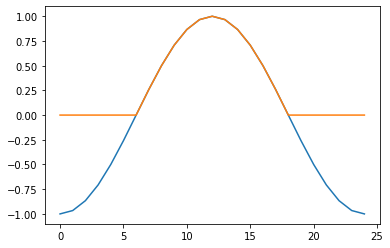

In [7]:
Q_euv = np.zeros_like(Q)
Sun_Heat  = 100
Local_time = np.linspace(0,24,25)  # for 1 days
# a factor that will make Qeuv = 0 [in 0 to 6] and [in 18 - 24] and a sin wave in the rest
factor     =  -np.cos((Local_time/24)*2*np.pi)
plt.plot(Local_time,factor)
for i in range(len(factor)):
    if factor[i] < 0:
        factor[i] = 0
plt.plot(Local_time,factor)
Q_euv[(x>3) & (x<7)] = Sun_Heat
Q_tot = Q + Q_euv * factor[11]
print(Q_tot)
D   = Q_tot * (Delta_z2/Lambda)
print(D)

writing :  conduction_v1.png


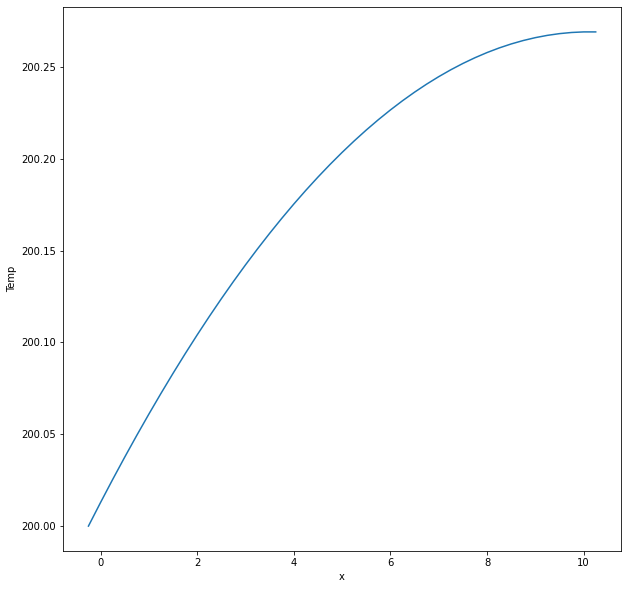

In [60]:

dx = 0.25

# set x with 1 ghost cell on both sides:
x = np.arange(-dx, 10 + 2 * dx, dx)

t_lower = 200.0
t_upper = 1000.0

nPts = len(x)

# set default coefficients for the solver:
a = np.zeros(nPts) - 1
b = np.zeros(nPts) + 2
c = np.zeros(nPts) - 1
d = D

# boundary conditions (bottom - fixed):
a[0] = 0
b[0] = 1
c[0] = 0
d[0] = t_lower

# top - floating boundary:
a[-1] = 1
b[-1] = -1
c[-1] = 0
d[-1] = t_upper*0

# Add a source term:

# solve for Temperature:
t = solve_tridiagonal(a, b, c, d)

# plot:
fig = plt.figure(figsize = (10,10),facecolor = 'white')
ax = fig.add_subplot(111)

ax.plot(x, t)
plt.ylabel('Temp')
plt.xlabel('x')

plotfile = 'conduction_v1.png'
print('writing : ',plotfile)    
#fig.savefig(plotfile)
plt.show()
plt.close()
    


[-0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5
  2.75  3.    3.25  3.5   3.75  4.    4.25  4.5   4.75  5.    5.25  5.5
  5.75  6.    6.25  6.5   6.75  7.    7.25  7.5   7.75  8.    8.25  8.5
  8.75  9.    9.25  9.5   9.75 10.   10.25]
writing :  conduction_v1.png


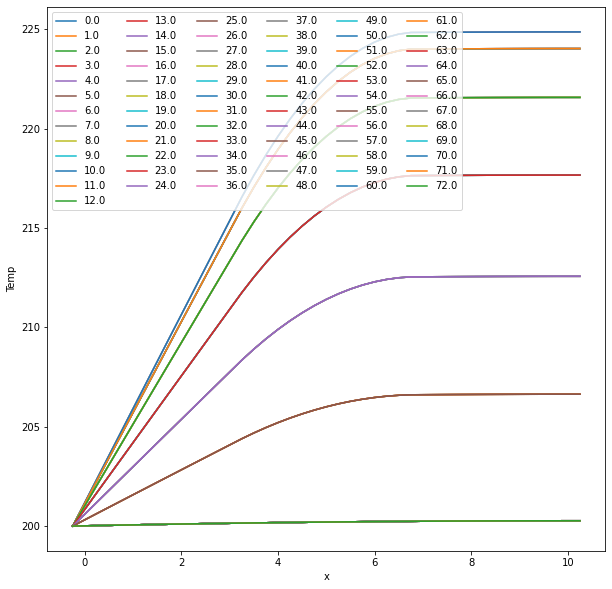

In [61]:
import datetime as datetime
Local_time_datetime = []
Q_euv = np.zeros_like(Q)
Sun_Heat  = 100
print(x)
Local_time = np.linspace(0,72,73)  # for 3 days
for index in range(len(Local_time)):
    Local_time_datetime.append(datetime.datetime(year = 2000, month = 1, day = 1) +
                               datetime.timedelta(hours = int(Local_time[index])))
Temp_memory = np.zeros([len(Local_time),len(x)])
# a factor that will make Qeuv = 0 [in 0 to 6] and [in 18 - 24] and a sin wave in the rest
factor     =  -np.cos((Local_time/24)*2*np.pi)
#plt.plot(Local_time,factor)

fig = plt.figure(figsize = (10,10),facecolor = 'white')
ax = fig.add_subplot(111)
for i in range(len(factor)):
    if factor[i] < 0:
        factor[i] = 0
#plt.plot(Local_time,factor)

for i in range(len(factor)):
    if factor[i] < 0:
        factor[i] = 0
    Q_euv[(x>3) & (x<7)] = Sun_Heat
    Q_tot = Q + Q_euv * factor[i]
    #print(Q_tot)
    D   = Q_tot * (Delta_z2/Lambda)
    #print(D)



# set x with 1 ghost cell on both sides:
    x = np.arange(-dx, 10 + 2 * dx, dx)

    t_lower = 200.0
    t_upper = 1000.0

    nPts = len(x)

    # set default coefficients for the solver:
    a = np.zeros(nPts) - 1
    b = np.zeros(nPts) + 2
    c = np.zeros(nPts) - 1
    d = D

    # boundary conditions (bottom - fixed):
    a[0] = 0
    b[0] = 1
    c[0] = 0
    d[0] = t_lower

    # top - floating boundary:
    a[-1] = 1
    b[-1] = -1
    c[-1] = 0
    d[-1] = t_upper*0

    # Add a source term:

    # solve for Temperature:
    t = solve_tridiagonal(a, b, c, d)

# plot:



    ax.plot(x, t, label = Local_time[i])
    Temp_memory[i]=t
plt.ylabel('Temp')
plt.xlabel('x')
plt.legend(ncols= 6)

plotfile = 'conduction_v1.png'
print('writing : ',plotfile)    
#fig.savefig(plotfile)
plt.show()
plt.close()

Text(0, 0.5, 'T (K)')

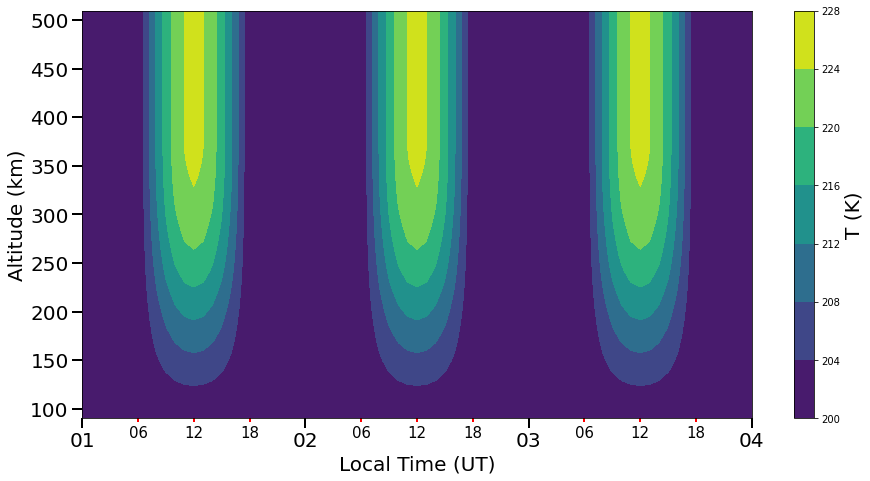

In [62]:
import matplotlib.dates as md
fig = plt.figure(figsize = (15,7.5),facecolor = 'white')
ax = fig.add_subplot(111)
#CS2 = ax2.contour(CS, levels=CS.levels[::2], colors='r', origin=origin)

CS = ax.contourf(Local_time_datetime,100+40*x,Temp_memory.T)
plt.ylabel('Altitude (km)',fontsize  = 20)
plt.xlabel('Local Time (UT)',fontsize = 20)
xloc=md.HourLocator(interval = 24)
ax.xaxis.set_major_locator(xloc)
majorFmt = md.DateFormatter('%d')
ax.xaxis.set_major_formatter(majorFmt)

xloc_hour=md.HourLocator(interval = 6)
ax.xaxis.set_minor_locator(xloc_hour)
minorFmt = md.DateFormatter('%H')
ax.xaxis.set_minor_formatter(minorFmt)

ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=10,labelsize = 20)
ax.tick_params(which='minor', length=4, color='r',labelsize = 15)

cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('T (K)',fontsize = 20)

# This is for the afternoon
1) Convert x to altitude

2) Hook up the hydrostatic solver

3) Plot T , [O], [O2], [N2] vs Time

4) Add Tides and F10.7 dependence

5) Switch from Steady state to dT/dt

In [78]:
Local_time_datetime = []
dx = 4.0
x = 100 + np.arange(-dx, 400 +  2*dx, dx)

Q_euv = np.zeros_like(x)
Q     = np.ones_like(Q_euv)*0.4
Sun_Heat  = 0.4

Local_time = np.linspace(0,72,73)  # for 3 days
for index in range(len(Local_time)):
    Local_time_datetime.append(datetime.datetime(year = 2000, month = 1, day = 1) +
                               datetime.timedelta(hours = int(Local_time[index])))
Temp_memory = np.zeros([len(Local_time),len(x)])
factor     =  -np.cos((Local_time/24)*2*np.pi)

print(len(x))

for i in range(len(factor)):
    if factor[i] < 0:
        factor[i] = 0
        
    Q_euv[(x>200) & (x<400)] = Sun_Heat
    Q_tot = Q + Q_euv * factor[i]
    D   = Q_tot * (Delta_z2/Lambda)
print(Q_euv)

103
[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4
 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4
 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4
 0.4 0.4 0.4 0.4 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]


6460.0


[0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4
 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4
 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4
 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4
 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4
 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4
 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4
 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4
 0.4 0.4 0.4 0.4 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]


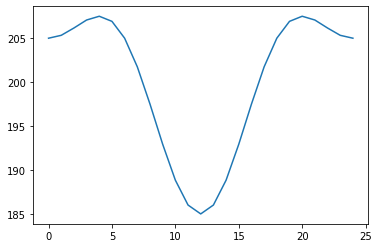

In [91]:
#THIS IS FOR ADDING TIDES
Local_time = np.linspace(0,24,25)  # for 3 days
##### t_lower 
#print(Local_time)
Amp_Di    = 10
Amp_Sd    = 5
Phase_Di  = np.pi/2
Phase_Sd  = (3/2)*np.pi
t_lower = 200 + Amp_Di * np.sin((Local_time/24)*2*np.pi+Phase_Di) + Amp_Sd * np.sin((Local_time/24)*2*2*np.pi+Phase_Sd)
plt.plot(Local_time,t_lower)
print(Q)
print(Q_euv)


[ 96. 100. 104. 108. 112. 116. 120. 124. 128. 132. 136. 140. 144. 148.
 152. 156. 160. 164. 168. 172. 176. 180. 184. 188. 192. 196. 200. 204.
 208. 212. 216. 220. 224. 228. 232. 236. 240. 244. 248. 252. 256. 260.
 264. 268. 272. 276. 280. 284. 288. 292. 296. 300. 304. 308. 312. 316.
 320. 324. 328. 332. 336. 340. 344. 348. 352. 356. 360. 364. 368. 372.
 376. 380. 384. 388. 392. 396. 400. 404. 408. 412. 416. 420. 424. 428.
 432. 436. 440. 444. 448. 452. 456. 460. 464. 468. 472. 476. 480. 484.
 488. 492. 496. 500. 504.]
writing :  conduction_v1.png


Text(0, 0.5, 'T (K)')

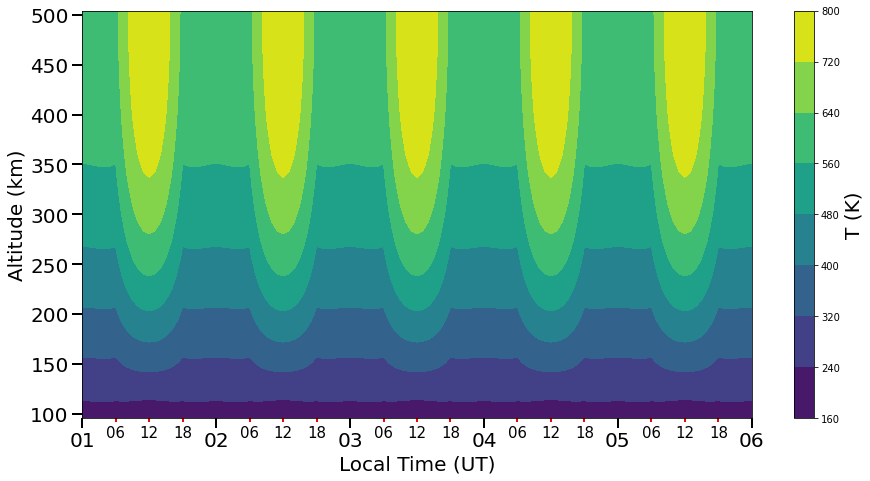

In [92]:

Local_time_datetime = []
Sun_Heat  = 0.40
Lambda = 80
Delta_z = x[1]-x[0]
Delta_z2= Delta_z * Delta_z
D = Q * Delta_z2 / Lambda
print(x)
Local_time = np.linspace(0,24*5,(24*5)+1)  # for 3 days
for index in range(len(Local_time)):
    Local_time_datetime.append(datetime.datetime(year = 2000, month = 1, day = 1) +
                               datetime.timedelta(hours = int(Local_time[index])))
Temp_memory = np.zeros([len(Local_time),len(x)])
# a factor that will make Qeuv = 0 [in 0 to 6] and [in 18 - 24] and a sin wave in the rest
factor     =  -np.cos((Local_time/24)*2*np.pi)
#plt.plot(Local_time,factor)

fig = plt.figure(figsize = (10,10),facecolor = 'white')
ax = fig.add_subplot(111)
for i in range(len(factor)):
    if factor[i] < 0:
        factor[i] = 0
#plt.plot(Local_time,factor)

for i in range(len(factor)):
    if factor[i] < 0:
        factor[i] = 0
    Q_euv[(x>200) & (x<400)] = Sun_Heat
    #print(Q_euv)
    Q_tot = Q + Q_euv * factor[i]
    #print(Q_tot)
    D   = Q_tot * (Delta_z2/Lambda)
    #print(D)



# set x with 1 ghost cell on both sides:


    t_lower = 200 + Amp_Di * np.sin((Local_time/24)*2*np.pi+Phase_Di) + Amp_Sd * np.sin((Local_time/24)*2*2*np.pi+Phase_Sd)
    t_upper = 1000.0

    nPts = len(x)

    # set default coefficients for the solver:
    a = np.zeros(nPts) - 1
    b = np.zeros(nPts) + 2
    c = np.zeros(nPts) - 1
    d = D

    # boundary conditions (bottom - fixed):
    a[0] = 0
    b[0] = 1
    c[0] = 0
    d[0] = t_lower[i]
    #print(t_lower[i])

    # top - floating boundary:
    a[-1] = 1
    b[-1] = -1
    c[-1] = 0
    d[-1] = t_upper*0

    # Add a source term:

    # solve for Temperature:
    t = solve_tridiagonal(a, b, c, d)

# plot:



    ax.plot(x, t, label = Local_time[i])
    Temp_memory[i]=t
plt.ylabel('Temp')
plt.xlabel('x')
plt.legend(ncols= 6)

plotfile = 'conduction_v1.png'
print('writing : ',plotfile)    
#fig.savefig(plotfile)
#plt.show()
plt.close()


fig = plt.figure(figsize = (15,7.5),facecolor = 'white')
ax = fig.add_subplot(111)
#CS2 = ax2.contour(CS, levels=CS.levels[::2], colors='r', origin=origin)

CS = ax.contourf(Local_time_datetime,x,Temp_memory.T)
plt.ylabel('Altitude (km)',fontsize  = 20)
plt.xlabel('Local Time (UT)',fontsize = 20)
xloc=md.HourLocator(interval = 24)
ax.xaxis.set_major_locator(xloc)
majorFmt = md.DateFormatter('%d')
ax.xaxis.set_major_formatter(majorFmt)

xloc_hour=md.HourLocator(interval = 6)
ax.xaxis.set_minor_locator(xloc_hour)
minorFmt = md.DateFormatter('%H')
ax.xaxis.set_minor_formatter(minorFmt)

ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=10,labelsize = 20)
ax.tick_params(which='minor', length=4, color='r',labelsize = 15)

cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('T (K)',fontsize = 20)

In [93]:
#### THIS IS FOR F10.7  --> Then Sun_Heat is the variable that is going to change
F10_7  = 100 + (50/(24*365))* Local_time + 25 * np.sin((Local_time / (27*24)*2*np.pi))
print(len(F10_7))
Sun_Heat = F10_7[i]* 0.4/100
print(len(x))
D

121
103


array([2.05e+02, 8.00e-02, 8.00e-02, 8.00e-02, 8.00e-02, 8.00e-02,
       8.00e-02, 8.00e-02, 8.00e-02, 8.00e-02, 8.00e-02, 8.00e-02,
       8.00e-02, 8.00e-02, 8.00e-02, 8.00e-02, 8.00e-02, 8.00e-02,
       8.00e-02, 8.00e-02, 8.00e-02, 8.00e-02, 8.00e-02, 8.00e-02,
       8.00e-02, 8.00e-02, 8.00e-02, 8.00e-02, 8.00e-02, 8.00e-02,
       8.00e-02, 8.00e-02, 8.00e-02, 8.00e-02, 8.00e-02, 8.00e-02,
       8.00e-02, 8.00e-02, 8.00e-02, 8.00e-02, 8.00e-02, 8.00e-02,
       8.00e-02, 8.00e-02, 8.00e-02, 8.00e-02, 8.00e-02, 8.00e-02,
       8.00e-02, 8.00e-02, 8.00e-02, 8.00e-02, 8.00e-02, 8.00e-02,
       8.00e-02, 8.00e-02, 8.00e-02, 8.00e-02, 8.00e-02, 8.00e-02,
       8.00e-02, 8.00e-02, 8.00e-02, 8.00e-02, 8.00e-02, 8.00e-02,
       8.00e-02, 8.00e-02, 8.00e-02, 8.00e-02, 8.00e-02, 8.00e-02,
       8.00e-02, 8.00e-02, 8.00e-02, 8.00e-02, 8.00e-02, 8.00e-02,
       8.00e-02, 8.00e-02, 8.00e-02, 8.00e-02, 8.00e-02, 8.00e-02,
       8.00e-02, 8.00e-02, 8.00e-02, 8.00e-02, 8.00e-02, 8.00e

[ 96. 100. 104. 108. 112. 116. 120. 124. 128. 132. 136. 140. 144. 148.
 152. 156. 160. 164. 168. 172. 176. 180. 184. 188. 192. 196. 200. 204.
 208. 212. 216. 220. 224. 228. 232. 236. 240. 244. 248. 252. 256. 260.
 264. 268. 272. 276. 280. 284. 288. 292. 296. 300. 304. 308. 312. 316.
 320. 324. 328. 332. 336. 340. 344. 348. 352. 356. 360. 364. 368. 372.
 376. 380. 384. 388. 392. 396. 400. 404. 408. 412. 416. 420. 424. 428.
 432. 436. 440. 444. 448. 452. 456. 460. 464. 468. 472. 476. 480. 484.
 488. 492. 496. 500. 504.]
writing :  conduction_v1.png


Text(0, 0.5, 'T (K)')

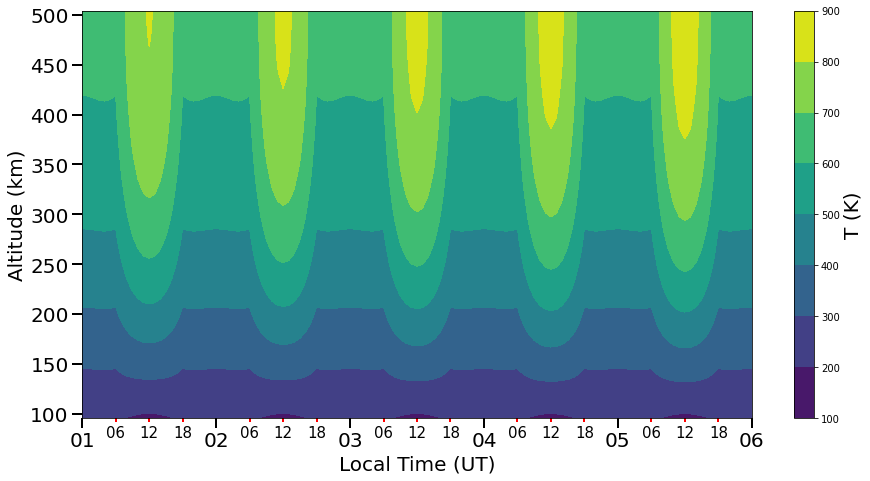

In [94]:

Local_time_datetime = []
Sun_Heat  = 0.40
Lambda = 80
Delta_z = x[1]-x[0]
Delta_z2= Delta_z * Delta_z
D = Q * Delta_z2 / Lambda
print(x)
Local_time = np.linspace(0,24*5,(24*5)+1)  # for 3 days
for index in range(len(Local_time)):
    Local_time_datetime.append(datetime.datetime(year = 2000, month = 1, day = 1) +
                               datetime.timedelta(hours = int(Local_time[index])))
Temp_memory = np.zeros([len(Local_time),len(x)])
# a factor that will make Qeuv = 0 [in 0 to 6] and [in 18 - 24] and a sin wave in the rest
factor     =  -np.cos((Local_time/24)*2*np.pi)
#plt.plot(Local_time,factor)

fig = plt.figure(figsize = (10,10),facecolor = 'white')
ax = fig.add_subplot(111)
for i in range(len(factor)):
    if factor[i] < 0:
        factor[i] = 0
#plt.plot(Local_time,factor)

for i in range(len(factor)):
    if factor[i] < 0:
        factor[i] = 0
    Sun_Heat = F10_7[i]* 0.4/100
    Q_euv[(x>200) & (x<400)] = Sun_Heat
    #print(Q_euv)
    Q_tot = Q + Q_euv * factor[i]
    #print(Q_tot)
    D   = Q_tot * (Delta_z2/Lambda)
    #print(D)



# set x with 1 ghost cell on both sides:


    t_lower = 200 + Amp_Di * np.sin((Local_time/24)*2*np.pi+Phase_Di) + Amp_Sd * np.sin((Local_time/24)*2*2*np.pi+Phase_Sd)
    t_upper = 1000.0

    nPts = len(x)

    # set default coefficients for the solver:
    a = np.zeros(nPts) - 1
    b = np.zeros(nPts) + 2
    c = np.zeros(nPts) - 1
    d = D

    # boundary conditions (bottom - fixed):
    a[0] = 0
    b[0] = 1
    c[0] = 0
    d[0] = t_lower[i]
    #print(t_lower[i])

    # top - floating boundary:
    a[-1] = 1
    b[-1] = -1
    c[-1] = 0
    d[-1] = t_upper*0

    # Add a source term:

    # solve for Temperature:
    t = solve_tridiagonal(a, b, c, d)

# plot:



    ax.plot(x, t, label = Local_time[i])
    Temp_memory[i]=t
plt.ylabel('Temp')
plt.xlabel('x')
plt.legend(ncols= 6)

plotfile = 'conduction_v1.png'
print('writing : ',plotfile)    
#fig.savefig(plotfile)
#plt.show()
plt.close()


fig = plt.figure(figsize = (15,7.5),facecolor = 'white')
ax = fig.add_subplot(111)
#CS2 = ax2.contour(CS, levels=CS.levels[::2], colors='r', origin=origin)

CS = ax.contourf(Local_time_datetime,x,Temp_memory.T)
plt.ylabel('Altitude (km)',fontsize  = 20)
plt.xlabel('Local Time (UT)',fontsize = 20)
xloc=md.HourLocator(interval = 24)
ax.xaxis.set_major_locator(xloc)
majorFmt = md.DateFormatter('%d')
ax.xaxis.set_major_formatter(majorFmt)

xloc_hour=md.HourLocator(interval = 6)
ax.xaxis.set_minor_locator(xloc_hour)
minorFmt = md.DateFormatter('%H')
ax.xaxis.set_minor_formatter(minorFmt)

ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=10,labelsize = 20)
ax.tick_params(which='minor', length=4, color='r',labelsize = 15)

cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('T (K)',fontsize = 20)


In [249]:
def gravity(Alt):
    return 3.99e14/(((Earth_r+Alt)*1000)**2)

def Density(T,Gravity,Altitude,m,n_0):
    k        = 1.38e-23
    Dens      = [n_0]
    H         = []
    delta_alt = 4000
    for i in range(1,len(T)):
        #print(len(T))
        #print(len(Gravity))
        #delta_alt = (Altitude[i]-Altitude[i-1])
        H_a    = (k * ((T[i-1]+T[i])/2))/(m * 1.67e-27 * ((Gravity[i-1]+Gravity[i])/2))
        H.append(H_a)
        aux = (T[i-1]/T[i])*Dens[i-1]*np.exp((-delta_alt)/H_a)
        Dens.append(aux)
    return Dens , H

In [313]:
Earth_r  = 6370
Gravity  = gravity(x)

#Temp     = Lin_temperature(Altitude)
O2       = 32
O        = 16
N2       = 28
AMU      = [O2,O,N2]
n_0      = [1e18,0.3e19,1e19]


O2_Density = np.ones_like(Temp_memory)
O_Density  = np.ones_like(O2_Density)
N2_Density = np.ones_like(O_Density)


for i in range(len(Local_time)):
    O2_Density[i,:] = Density(Temp_memory[i],Gravity,Altitude,AMU[0],n_0[0])[0]
    O_Density[i,:]  = Density(Temp_memory[i],Gravity,Altitude,AMU[1],n_0[1])[0]
    N2_Density[i,:] = Density(Temp_memory[i],Gravity,Altitude,AMU[2],n_0[2])[0]



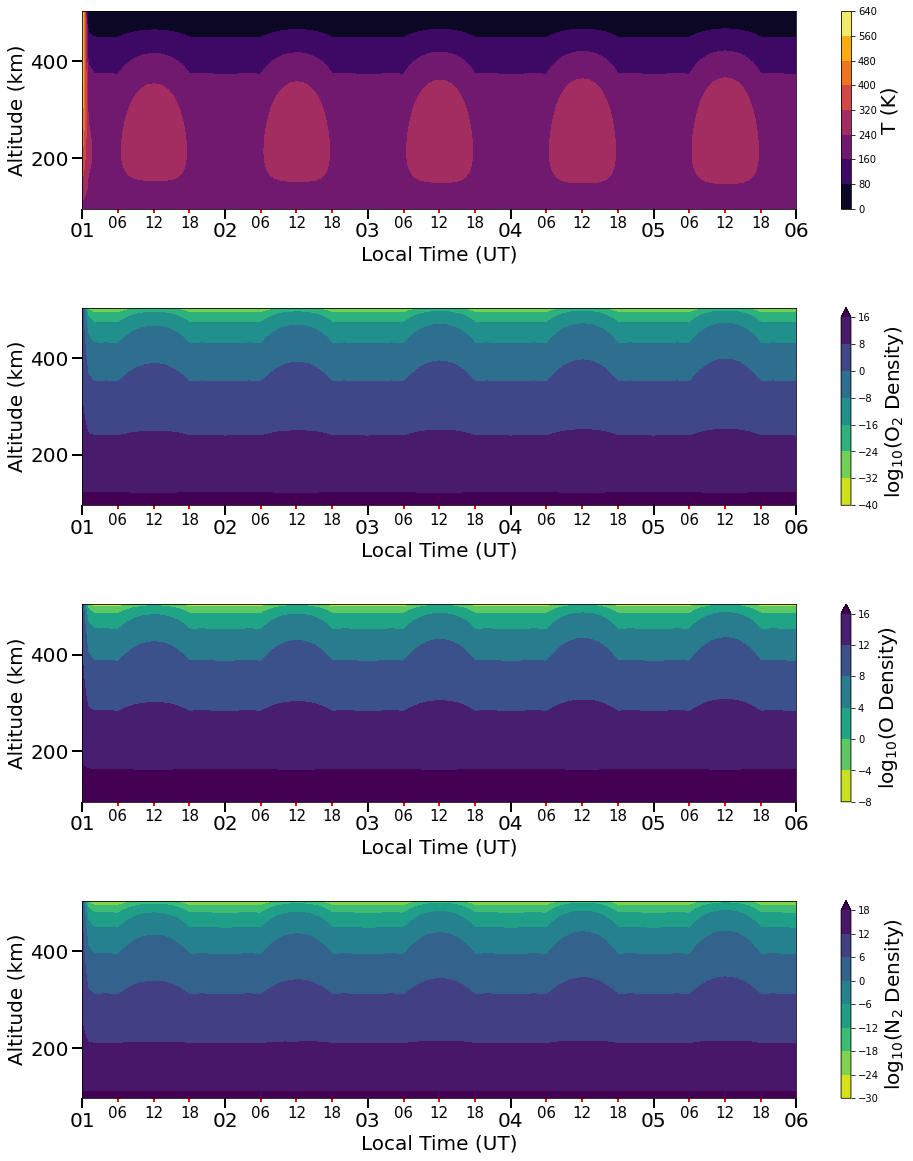

In [314]:
fig, (ax0,ax1,ax2,ax3) = plt.subplots(4,1,figsize=(16, 20),facecolor = 'white')


#CS2 = ax2.contour(CS, levels=CS.levels[::2], colors='r', origin=origin)

CS = ax0.contourf(Local_time_datetime,x,Temp_memory.T,cmap = 'inferno')


cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('T (K)',fontsize = 20)

CS_1 = ax1.contourf(Local_time_datetime,x,np.log10(O2_Density.T),cmap = 'viridis_r', extend = 'max')
cbar = fig.colorbar(CS_1)
cbar.ax.set_ylabel(r'log$_{10}$(O$_{2}$ Density)',fontsize = 20)
#cbar.ax.set_yticklabels(np.arange(1,20,5))

CS_2 = ax2.contourf(Local_time_datetime,x,np.log10(O_Density.T),cmap = 'viridis_r',extend = 'max')
cbar = fig.colorbar(CS_2)
cbar.ax.set_ylabel(r'log$_{10}$(O Density)',fontsize = 20)

CS_3 = ax3.contourf(Local_time_datetime,x,np.log10(N2_Density.T),cmap = 'viridis_r',extend = 'max')
cbar = fig.colorbar(CS_3)
cbar.ax.set_ylabel(r'log$_{10}$(N$_{2}$ Density)',fontsize = 20)

for ax in [ax0,ax1,ax2,ax3]:
    ax.set_ylabel('Altitude (km)',fontsize  = 20)
    ax.set_xlabel('Local Time (UT)',fontsize = 20)
    xloc=md.HourLocator(interval = 24)
    ax.xaxis.set_major_locator(xloc)
    majorFmt = md.DateFormatter('%d')
    ax.xaxis.set_major_formatter(majorFmt)

    xloc_hour=md.HourLocator(interval = 6)
    ax.xaxis.set_minor_locator(xloc_hour)
    minorFmt = md.DateFormatter('%H')
    ax.xaxis.set_minor_formatter(minorFmt)

    ax.tick_params(which='both', width=2)
    ax.tick_params(which='major', length=10,labelsize = 20)
    ax.tick_params(which='minor', length=4, color='r',labelsize = 15)

plt.subplots_adjust(hspace=0.5)


# Now we move to time dependence

In [310]:
Local_time_datetime = []
Sun_Heat  = 0.40
Lambda = 80
Delta_z = x[1]-x[0]
Delta_z2= Delta_z * Delta_z
Delta_t = 3600
#D = Q * Delta_z2 / Lambda
K  = (Delta_t * Lambda)/Delta_z2


Local_time = np.linspace(0,24*5,(24*5)+1)  # for 3 days
for index in range(len(Local_time)):
    Local_time_datetime.append(datetime.datetime(year = 2000, month = 1, day = 1) +
                               datetime.timedelta(hours = int(Local_time[index])))
Temp_memory = np.zeros([len(Local_time),len(x)])
# a factor that will make Qeuv = 0 [in 0 to 6] and [in 18 - 24] and a sin wave in the rest
factor     =  -np.cos((Local_time/24)*2*np.pi)

##############

i = 0
if factor[i] < 0:
    factor[i] = 0
Sun_Heat = F10_7[i]* 0.4/100
Q_euv[(x>200) & (x<400)] = Sun_Heat

Q_tot = Q + Q_euv * factor[i]

D   = Q_tot * (Delta_z2/Lambda)




# set x with 1 ghost cell on both sides:


t_lower = 200 + Amp_Di * np.sin((Local_time/24)*2*np.pi+Phase_Di) + Amp_Sd * np.sin((Local_time/24)*2*2*np.pi+Phase_Sd)
t_upper = 1000.0

nPts = len(x)

# set default coefficients for the solver:
a = np.zeros(nPts) - 1
b = np.zeros(nPts) + 2
c = np.zeros(nPts) - 1
d = D

# boundary conditions (bottom - fixed):
a[0] = 0
b[0] = 1
c[0] = 0
d[0] = t_lower[i]

# top - floating boundary:
a[-1] = 1
b[-1] = -1
c[-1] = 0
d[-1] = t_upper*0

t = solve_tridiagonal(a, b, c, d)

Temp_memory[i]=t

##################
for i in range(1,len(factor)):
    if factor[i] < 0:
        factor[i] = 0
    Sun_Heat = F10_7[i]* 0.4/100
    Q_euv[(x>200) & (x<400)] = Sun_Heat
    Q_tot = Q + Q_euv * factor[i]
    D   = Temp_memory[i-1] + Q_tot * Delta_t

    t_lower = 200 + Amp_Di * np.sin((Local_time/24)*2*np.pi+Phase_Di) + Amp_Sd * np.sin((Local_time/24)*2*2*np.pi+Phase_Sd)
    t_upper = 1000.0

    nPts = len(x)

    # set default coefficients for the solver:
    a = np.zeros(nPts) - K   #These are the coefficients that we move when we want the time dependence
    b = np.zeros(nPts) + 1+2*K
    c = np.zeros(nPts) - K
    d = D

    # boundary conditions (bottom - fixed):
    a[0] = 0
    b[0] = 1
    c[0] = 0
    d[0] = t_lower[i]
    #print(t_lower[i])

    # top - floating boundary:
    a[-1] = -K
    b[-1] = 1+2*K
    c[-1] = -K
    d[-1] = t_upper*0

    # Add a source term:

    # solve for Temperature:
    t = solve_tridiagonal(a, b, c, d)
    Temp_memory[i]=t



In [311]:
Temp_memory[-4]

array([207.07106781, 209.14062608, 211.13016085, 213.03967245,
       214.86916121, 216.61862744, 218.28807146, 219.8774936 ,
       221.38689416, 222.81627345, 224.16563179, 225.43496947,
       226.6242868 , 227.73358408, 228.7628616 , 229.71211966,
       230.58135855, 231.37057855, 232.07977995, 232.70896304,
       233.2581281 , 233.7272754 , 234.11640523, 234.42551785,
       234.65461353, 234.80369255, 234.87275518, 234.86180167,
       234.77083228, 234.59984729, 234.34884694, 234.0178315 ,
       233.60680121, 233.11575633, 232.54469711, 231.8936238 ,
       231.16253663, 230.35143586, 229.46032173, 228.48919448,
       227.43805434, 226.30690156, 225.09573636, 223.80455899,
       222.43336967, 220.98216863, 219.4509561 , 217.83973231,
       216.14849748, 214.37725184, 212.5259956 , 210.594729  ,
       208.58345224, 206.49216555, 204.32086915, 202.06956324,
       199.73824804, 197.32692377, 194.83559064, 192.26424885,
       189.61289861, 186.88154014, 184.07017364, 181.17

Text(0, 0.5, 'T (K)')

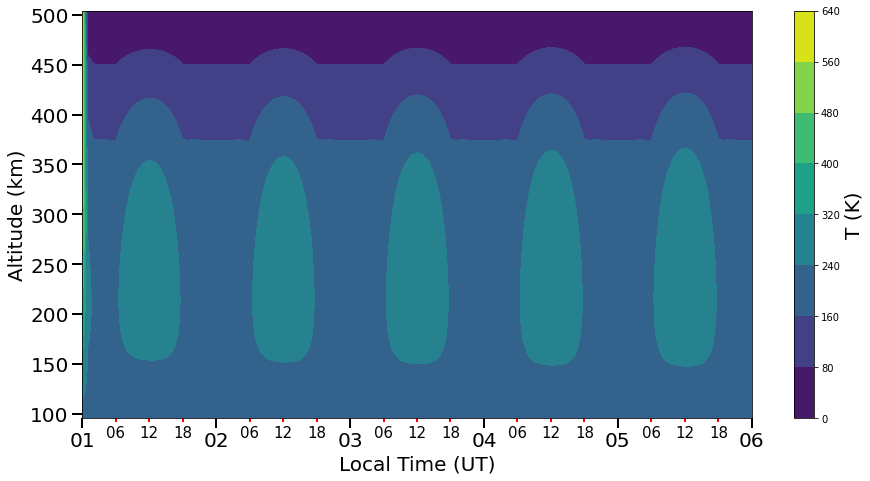

In [312]:
    

fig = plt.figure(figsize = (15,7.5),facecolor = 'white')
ax = fig.add_subplot(111)
#CS2 = ax2.contour(CS, levels=CS.levels[::2], colors='r', origin=origin)

CS = ax.contourf(Local_time_datetime,x,Temp_memory.T)
plt.ylabel('Altitude (km)',fontsize  = 20)
plt.xlabel('Local Time (UT)',fontsize = 20)
xloc=md.HourLocator(interval = 24)
ax.xaxis.set_major_locator(xloc)
majorFmt = md.DateFormatter('%d')
ax.xaxis.set_major_formatter(majorFmt)

xloc_hour=md.HourLocator(interval = 6)
ax.xaxis.set_minor_locator(xloc_hour)
minorFmt = md.DateFormatter('%H')
ax.xaxis.set_minor_formatter(minorFmt)

ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=10,labelsize = 20)
ax.tick_params(which='minor', length=4, color='r',labelsize = 15)

cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('T (K)',fontsize = 20)

In [ ]:
Earth_r  = 6370
Gravity  = gravity(x)

#Temp     = Lin_temperature(Altitude)
O2       = 32
O        = 16
N2       = 28
AMU      = [O2,O,N2]
n_0      = [1e18,0.3e19,1e19]


O2_Density = np.ones_like(Temp_memory)
O_Density  = np.ones_like(O2_Density)
N2_Density = np.ones_like(O_Density)


for i in range(len(Local_time)):
    O2_Density[i,:] = Density(Temp_memory[i],Gravity,Altitude,AMU[0],n_0[0])[0]
    O_Density[i,:]  = Density(Temp_memory[i],Gravity,Altitude,AMU[1],n_0[1])[0]
    N2_Density[i,:] = Density(Temp_memory[i],Gravity,Altitude,AMU[2],n_0[2])[0]

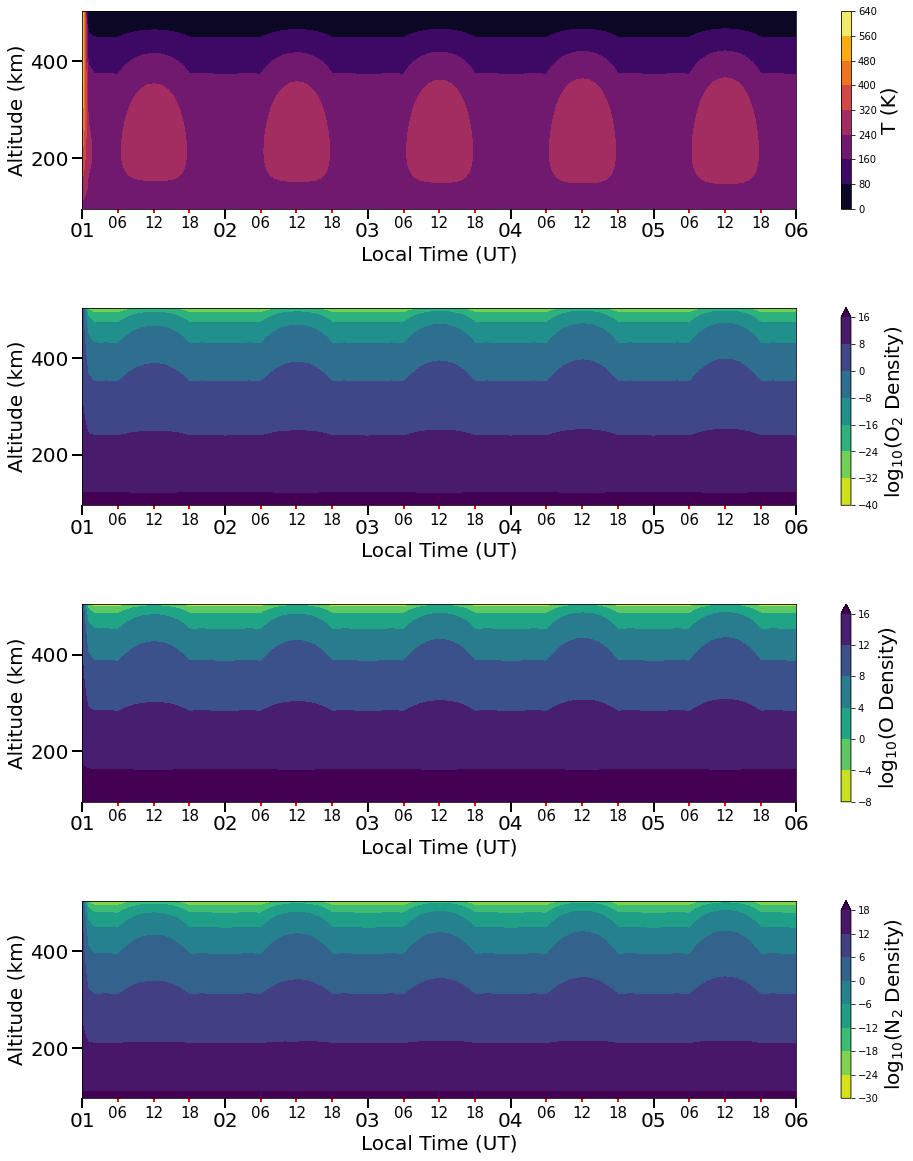

In [315]:
fig, (ax0,ax1,ax2,ax3) = plt.subplots(4,1,figsize=(16, 20),facecolor = 'white')


#CS2 = ax2.contour(CS, levels=CS.levels[::2], colors='r', origin=origin)

CS = ax0.contourf(Local_time_datetime,x,Temp_memory.T,cmap = 'inferno')


cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('T (K)',fontsize = 20)

CS_1 = ax1.contourf(Local_time_datetime,x,np.log10(O2_Density.T),cmap = 'viridis_r', extend = 'max')
cbar = fig.colorbar(CS_1)
cbar.ax.set_ylabel(r'log$_{10}$(O$_{2}$ Density)',fontsize = 20)
#cbar.ax.set_yticklabels(np.arange(1,20,5))

CS_2 = ax2.contourf(Local_time_datetime,x,np.log10(O_Density.T),cmap = 'viridis_r',extend = 'max')
cbar = fig.colorbar(CS_2)
cbar.ax.set_ylabel(r'log$_{10}$(O Density)',fontsize = 20)

CS_3 = ax3.contourf(Local_time_datetime,x,np.log10(N2_Density.T),cmap = 'viridis_r',extend = 'max')
cbar = fig.colorbar(CS_3)
cbar.ax.set_ylabel(r'log$_{10}$(N$_{2}$ Density)',fontsize = 20)

for ax in [ax0,ax1,ax2,ax3]:
    ax.set_ylabel('Altitude (km)',fontsize  = 20)
    ax.set_xlabel('Local Time (UT)',fontsize = 20)
    xloc=md.HourLocator(interval = 24)
    ax.xaxis.set_major_locator(xloc)
    majorFmt = md.DateFormatter('%d')
    ax.xaxis.set_major_formatter(majorFmt)

    xloc_hour=md.HourLocator(interval = 6)
    ax.xaxis.set_minor_locator(xloc_hour)
    minorFmt = md.DateFormatter('%H')
    ax.xaxis.set_minor_formatter(minorFmt)

    ax.tick_params(which='both', width=2)
    ax.tick_params(which='major', length=10,labelsize = 20)
    ax.tick_params(which='minor', length=4, color='r',labelsize = 15)

plt.subplots_adjust(hspace=0.5)
